<a href="https://colab.research.google.com/github/akiabe/udemy_PyTorch_DNN/blob/master/pytorch_nonlinear_sequence_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

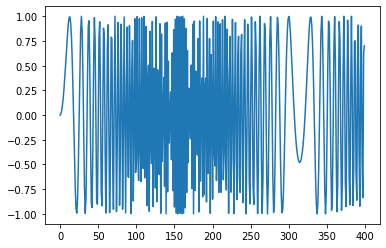

In [4]:
series = np.sin((0.1*np.arange(400))**2)
plt.plot(series)
plt.show()

In [5]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)
print(X.shape)
print(Y.shape)

N = len(X)

(390, 10)
(390, 1)


In [6]:
model = nn.Linear(T, 1)

In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [8]:
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

In [9]:
def full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs=200):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses[it] = loss.item()

    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[it] = test_loss.item()

    if (it+1) % 5 == 0:
      print(f"Epochs {it+1}/{epochs}, train loss: {loss.item():.4f}, test loss: {test_loss.item():.4f}")
  
  return train_losses, test_losses 

In [10]:
train_losses, test_losses = full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs=200)

Epochs 5/200, train loss: 0.5147, test loss: 0.6931
Epochs 10/200, train loss: 0.5437, test loss: 0.7551
Epochs 15/200, train loss: 0.4970, test loss: 0.5764
Epochs 20/200, train loss: 0.5003, test loss: 0.5446
Epochs 25/200, train loss: 0.4896, test loss: 0.6007
Epochs 30/200, train loss: 0.4895, test loss: 0.6254
Epochs 35/200, train loss: 0.4853, test loss: 0.5964
Epochs 40/200, train loss: 0.4854, test loss: 0.5786
Epochs 45/200, train loss: 0.4842, test loss: 0.5889
Epochs 50/200, train loss: 0.4840, test loss: 0.5965
Epochs 55/200, train loss: 0.4838, test loss: 0.5905
Epochs 60/200, train loss: 0.4836, test loss: 0.5880
Epochs 65/200, train loss: 0.4834, test loss: 0.5891
Epochs 70/200, train loss: 0.4834, test loss: 0.5913
Epochs 75/200, train loss: 0.4834, test loss: 0.5897
Epochs 80/200, train loss: 0.4833, test loss: 0.5891
Epochs 85/200, train loss: 0.4833, test loss: 0.5899
Epochs 90/200, train loss: 0.4833, test loss: 0.5900
Epochs 95/200, train loss: 0.4833, test loss: 0

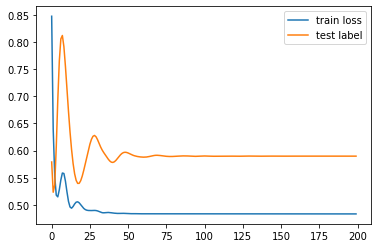

In [11]:
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test label")
plt.legend()
plt.show()

In [12]:
valid_target = Y[-N//2:]
valid_preds = []
last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(valid_preds) < len(valid_target):
  input_ = last_x.reshape(1, -1)
  p = model(input_)
  valid_preds.append(p[0,0].item())
  last_x = torch.cat((last_x[1:], p[0]))

In [13]:
print(len(last_x[0:]))
print(len(last_x[1:]))

10
9


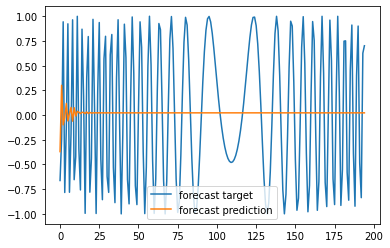

In [14]:
plt.plot(valid_target, label="forecast target")
plt.plot(valid_preds, label="forecast prediction")
plt.legend()
plt.show()